# Arbol de Decisión


## Importación de librerias

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obteniendo Datos


In [18]:
dataf = pd.read_csv('./processed/mammographic_masses_clean.csv')

In [19]:
dataf.head()

,Age,Shape,Margin,Density,Severity
0,67,3,5,3,1
1,58,4,5,3,1
2,28,1,1,3,0
3,57,1,5,3,1
4,76,1,4,3,1


## División en Conjunto de entrenamiento y de prueba


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = dataf.drop('Severity',axis=1)
y = dataf['Severity']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

## Árboles de decisión


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
arbol = DecisionTreeClassifier(criterion='gini',random_state=41)

In [25]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=41,
            splitter='best')

## Predicción y Evaluación¶
Evaluando el árbol de decisiones.

In [26]:
predictions = arbol.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

### Matriz de confusión

In [28]:
print(confusion_matrix(y_test,predictions))

[[78 28]
 [25 77]]


### Reporte de clasificación

In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.74      0.75       106
          1       0.73      0.75      0.74       102

avg / total       0.75      0.75      0.75       208



## Visualización de árbol

In [30]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(dataf.columns[1:])
features

['Shape', 'Margin', 'Density', 'Severity']

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

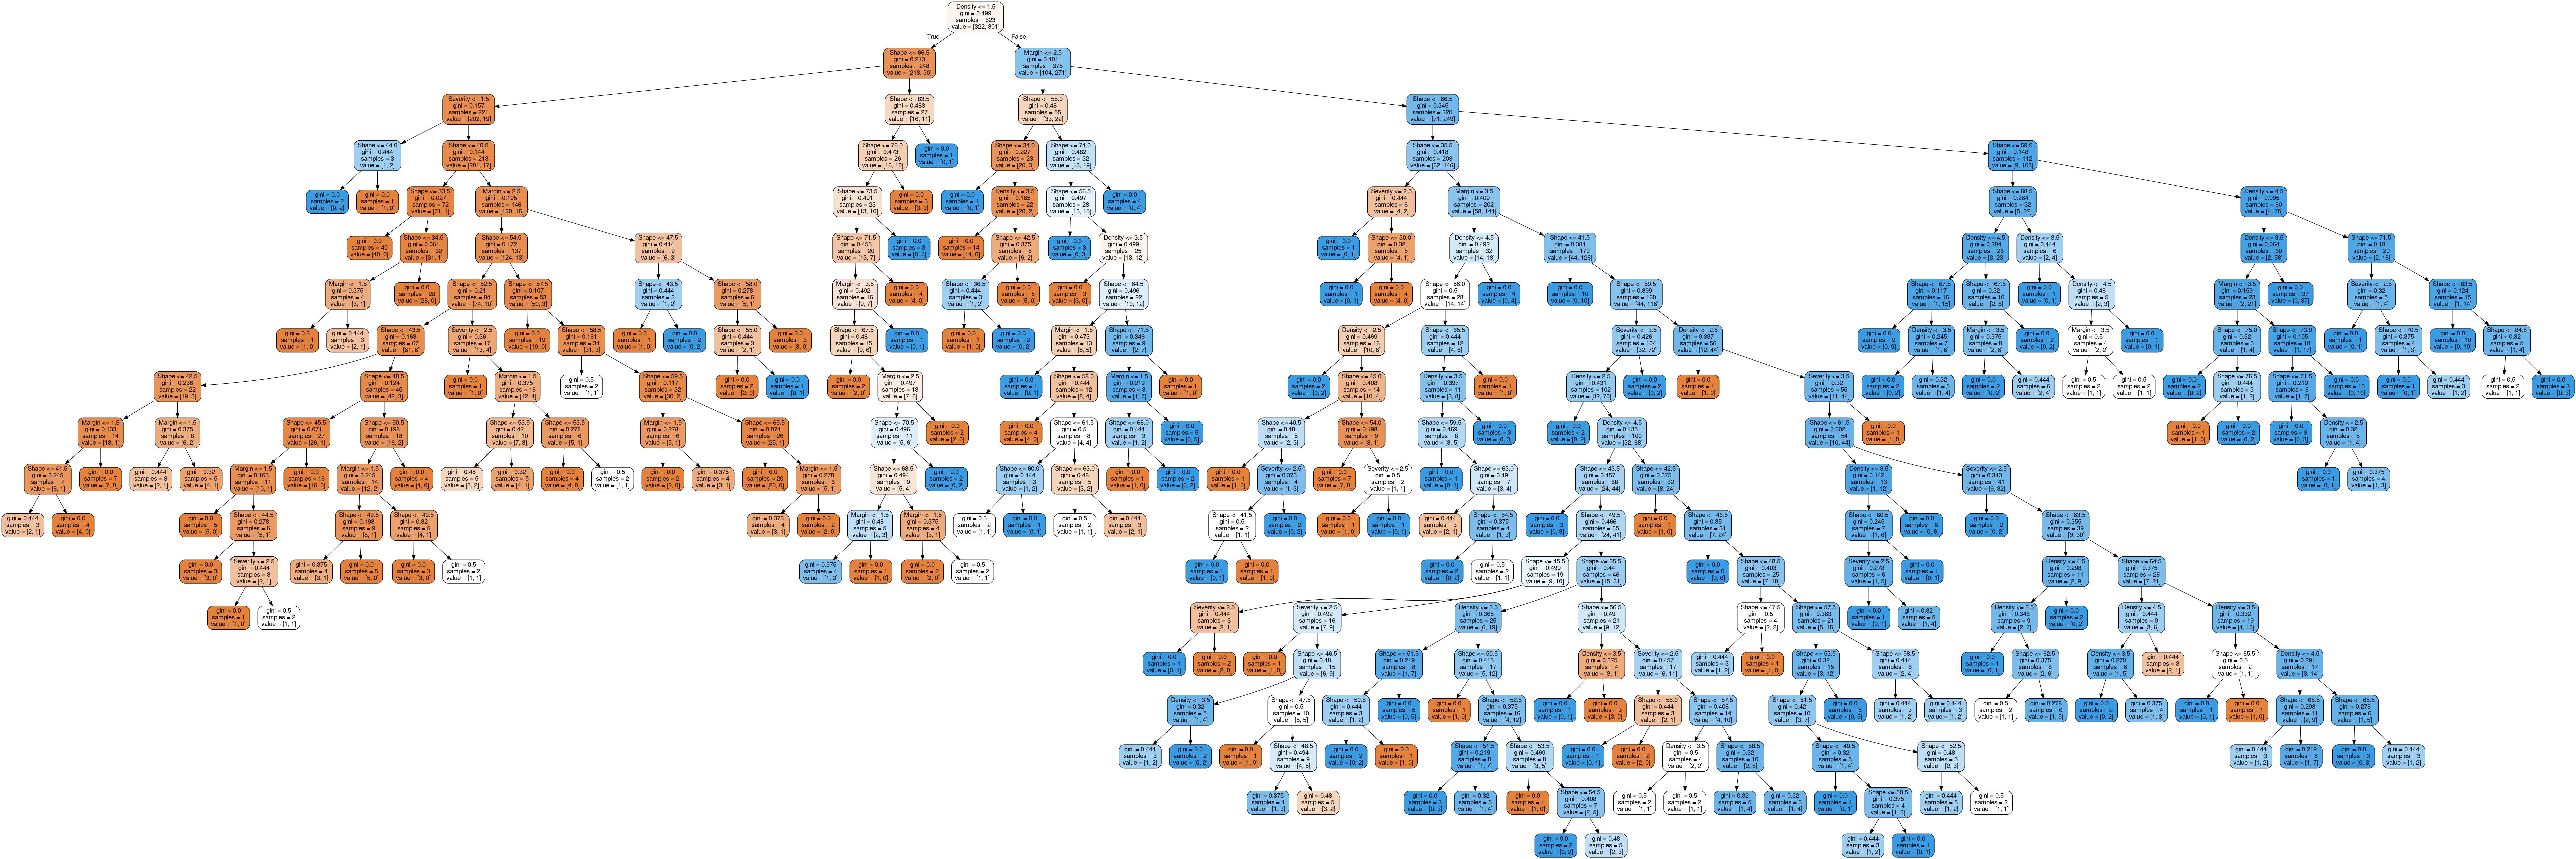

In [32]:
dot_data = StringIO()  
export_graphviz(arbol, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())